# [Fig. 1] Motivation for the study

Reproduces Fig 1 of the paper

In [1]:
%load_ext autoreload
%autoreload 2
import pens
import pandas as pd
import numpy as np
import xarray as xr
import pyleoclim as pyleo
import matplotlib.pyplot as plt
plt.style.use('default')
pens.set_style('journal_nogrid')

## 1. Reconstructions vs simulations

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'LMR v2.1'}, xlabel='time [year CE]', ylabel='GMST [°C]'>)

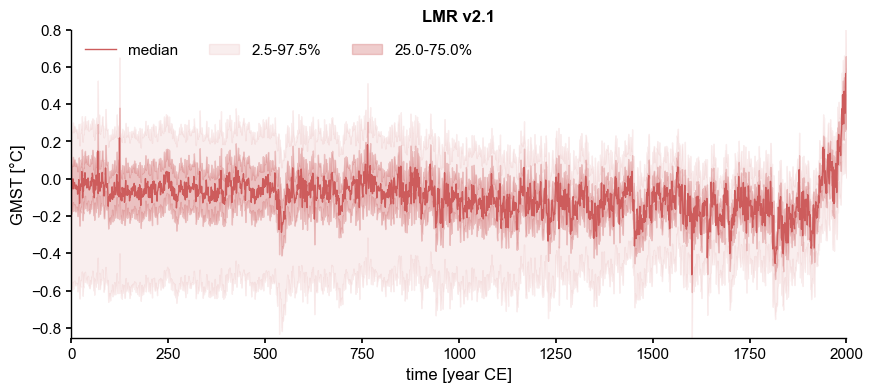

In [2]:
path = '../data/gmt_MCruns_ensemble_full_LMRv2.1.nc'
LMR = pens.EnsembleTS().load_nc(path, var='gmt')
LMR.label = 'LMR v2.1'
LMR.value_name = 'GMST'
LMR.value_unit = '\N{DEGREE SIGN}C'
LMR.time_unit = 'year CE'
LMR.plot_qs()

In [3]:
df = pd.read_table('../data/PMIP3_GMST.txt')
# create a new pandas.DataFrame to store the processed data
dfn = df.copy()

# remove the data columns for CESM and GISS ensemble members
for i in range(10):
    dfn = dfn.drop([f'CESM_member_{i+1}'], axis=1)
    
dfn = dfn.drop(['GISS-E2-R_r1i1p127.1'], axis=1)
dfn = dfn.drop(['GISS-E2-R_r1i1p127'], axis=1)
dfn = dfn.drop(['GISS-E2-R_r1i1p121'], axis=1)

# calculate the ensemble mean for CESM and GISS, and add the results into the table
dfn['CESM'] = df[[
    'CESM_member_1',
    'CESM_member_2',
    'CESM_member_3',
    'CESM_member_4',
    'CESM_member_5',
    'CESM_member_6',
    'CESM_member_7',
    'CESM_member_8',
    'CESM_member_9',
    'CESM_member_10',
]].mean(axis=1)

dfn['GISS'] = df[[
    'GISS-E2-R_r1i1p127.1',   
    'GISS-E2-R_r1i1p127',
    'GISS-E2-R_r1i1p121',
]].mean(axis=1)

# display the processed data
dfn

,Year,bcc_csm1_1,CCSM4,FGOALS_gl,FGOALS_s2,IPSL_CM5A_LR,MPI_ESM_P,CSIRO,HadCM3,CESM,GISS
0,850,-0.570693,-0.431830,NaN,-0.620995,-0.475963,-0.170230,NaN,-0.620517,0.049553,0.127429
1,851,-0.698903,-0.411177,NaN,-0.753160,-0.742970,-0.303124,-0.398695,-0.553043,0.193858,0.138796
2,852,-0.575440,-0.404802,NaN,-0.743508,-0.758939,-0.422623,-0.406343,-0.560791,0.185033,0.098170
3,853,-0.724757,-0.552719,NaN,-0.869331,-0.746460,-0.335177,-0.353557,-0.438949,0.120470,-0.054552
4,854,-0.724328,-0.734938,NaN,-0.826238,-0.684093,-0.650792,-0.416140,-0.812194,-0.081349,-0.407169
...,...,...,...,...,...,...,...,...,...,...,...
1161,2011,1.013544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1162,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1163,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1164,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


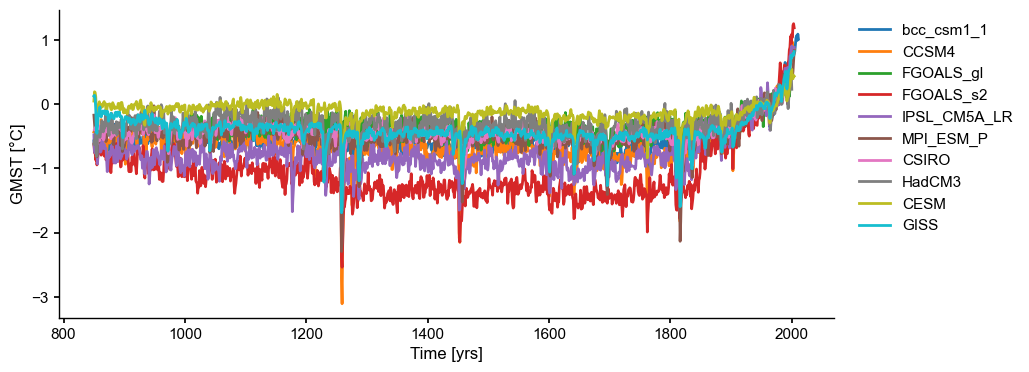

In [4]:
# store each pyleoclim.Series() object into a dictionary and plot
ts_dict = {}
for name in dfn.columns[1:]:
    ts_dict[name] = pyleo.Series(
        time=dfn['Year'].values,  # the time axis
        value=dfn[name].values,   # the value axis
        label=name,                  # optional metadata: the nickname of the series
        time_name='Time',            # optional metadata: the name of the time axis
        time_unit='yrs',             # optional metadata: the unit of the time axis
        value_name='GMST',     # optional metadata: the name of the value axis
        value_unit='\N{DEGREE SIGN}C',              # optional metadata: the unit of the value axis
        verbose=False)

ts_list = [v for k, v in ts_dict.items()]  # a pythonic way to convert the pyleo.Series items in the dictionary to a list
ms_pmip = pyleo.MultipleSeries(ts_list)
fig, ax = ms_pmip.plot(lgd_kwargs={
        'bbox_to_anchor': (1.25, 1),  # move the legend to the right side
    })

<Axes: xlabel='Time [yrs]', ylabel='GMST [°C]'>

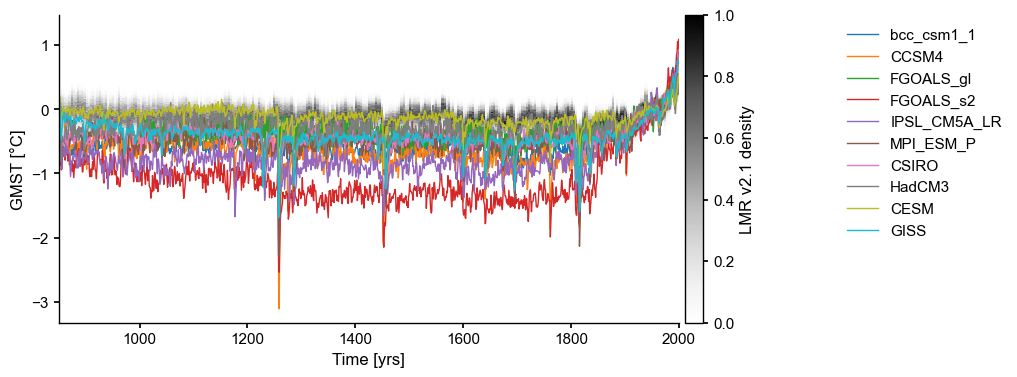

In [5]:
fig, ax = LMR.line_density(figsize=(8,4),xlim=(850,2000))
ms_pmip.plot(lgd_kwargs={'bbox_to_anchor': (1.25, 1)}, ax=ax, linewidth=1)

## 2. Comparing reconstructions

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'LMR v2.1'}, xlabel='Year CE', ylabel='NHT [°C]'>)

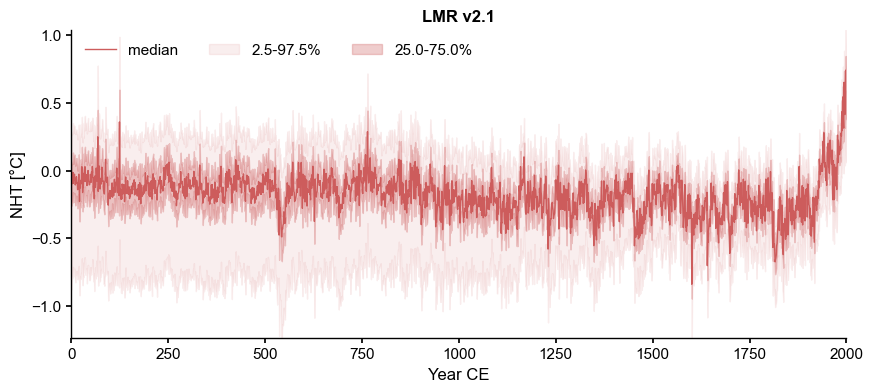

In [6]:
path = '../data/nhmt_MCruns_ensemble_full_LMRv2.1.nc'
LMR_nht = pens.EnsembleTS().load_nc(path, var='nhmt')
LMR_nht.label = 'LMR v2.1'
LMR_nht.time_name = 'Year CE'
LMR_nht.plot_qs(ylabel='NHT [\N{DEGREE SIGN}C]')

Now load the data from NOAA file:

In [7]:
path = '../data/buentgen2021recon.txt'
df = pd.read_csv(path,skiprows=115,delimiter='\t')
df.head()

,YearCE,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,Rmean,Rmed
0,1,-0.669554,-0.303244,-0.467243,-1.314425,-0.370,-0.573300,-0.685931,0.00,-0.225631,-0.379775,-0.435605,NaN,-0.355480,-0.862583,-0.430486,-0.505233,-0.433045
1,2,-0.448115,-0.532993,-0.556450,-1.058694,-0.219,-0.408151,-0.787994,-0.01,-0.217959,0.194776,-0.196139,NaN,-0.534690,-0.920016,0.068531,-0.401921,-0.428133
2,3,-0.519438,-0.488938,-0.572936,-1.226653,-0.154,-0.455268,-0.824891,-0.15,-0.326339,-0.144989,-0.299773,NaN,-0.628520,-0.793734,-0.085305,-0.476485,-0.472103
3,4,-0.231091,-0.312583,-0.505674,-1.496090,-0.107,-0.382701,-0.723426,-0.03,-0.181019,0.031611,-0.250385,NaN,-0.006623,-1.092359,0.024871,-0.375891,-0.240738
4,5,-0.585517,-0.314294,-0.558424,-1.038842,-0.080,-0.566686,-0.641757,-0.20,0.035370,-0.014277,-0.241596,NaN,-0.102210,-0.967983,-0.651108,-0.423380,-0.436359


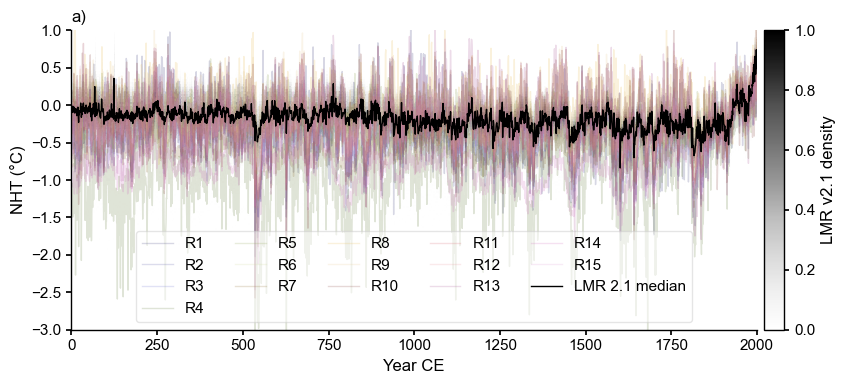

In [8]:
fs = (8,4)
fig, ax = LMR_nht.line_density(ylabel='NHT (\N{DEGREE SIGN}C)',label='LMR 2.1', figsize=fs)
cols = df.columns[1:16]
clr = plt.cm.tab20b(np.linspace(0,1,len(cols))) # define colors

for i, col in enumerate(cols):
    ax.plot(df['YearCE'],df[col],lw=1,alpha=0.2,color=clr[i],label=col)

LMR_nht.get_median().plot(color='black', linewidth=1, label = 'LMR 2.1 median', ax=ax)
ax.set_ylim(-3, 1)
ax.set_ylabel('NHT (\N{DEGREE SIGN}C)')
ax.legend(ncol=5, frameon=True, framealpha=0.5)
ax.set_title("a)",loc='left')
plt.tight_layout()
#fig.savefig('../figures/nht_comparison_spaghetti.pdf')

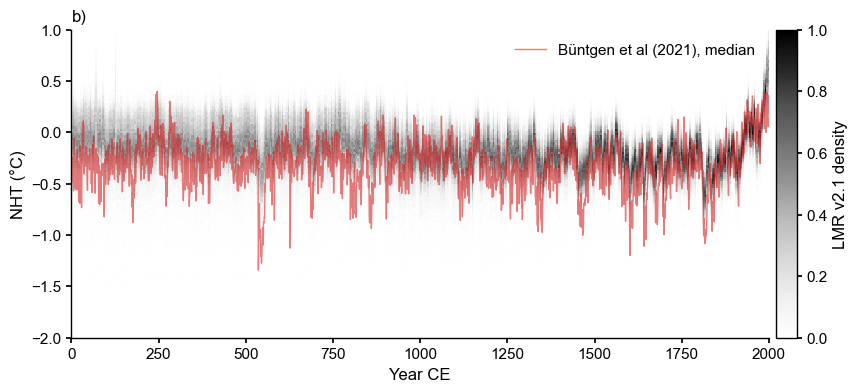

In [9]:
fig, ax = LMR_nht.line_density(ylabel='NHT (\N{DEGREE SIGN}C)',label='LMR 2.1')
ax.plot(df['YearCE'],df['Rmed'],lw=1,alpha=0.6,color='tab:red',label='Büntgen et al (2021), median')
ax.set_ylim(-2, 1)
ax.legend()
ax.set_title("b)",loc='left')
fig.set_size_inches(9,4)
#fig.savefig('../figures/nht_comparison_density.pdf')

### Assembling Figure 1

Text(0.0, 1.0, 'c) Comparison to other reconstructions')

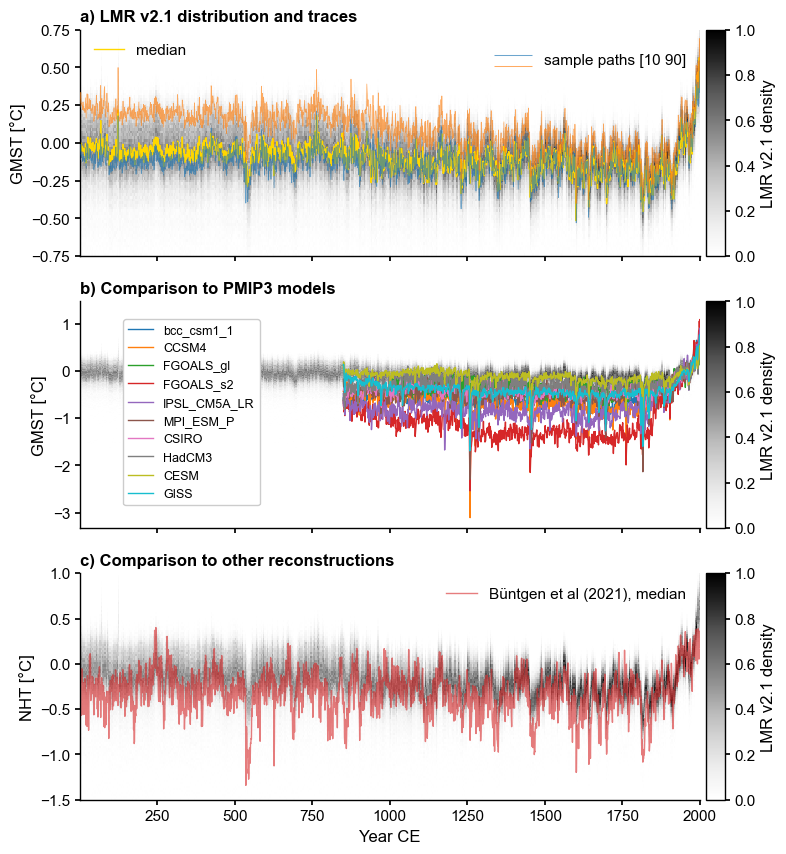

In [10]:
_ , ylabel = LMR.make_labels()
xlabel = 'Year CE'
fig, axs = plt.subplots(3,1,figsize = (8,10),sharex=True)
# panel a
LMR.line_density(ax=axs[0],ylim=[-.75,.75])
LMR.get_median().plot(color='gold',label='median',ax=axs[0])
lgd1 = axs[0].legend(ncol=2, loc='upper left')
axs[0].add_artist(lgd1)
LMR.plot_traces(ax=axs[0], indices = [9,89], alpha=0.65, 
                xlabel = '', ylabel=ylabel, xlim=[1,2000])
axs[0].set_title('a) ' + LMR.label + ' distribution and traces', 
                 fontweight='bold', loc='left')

# panel b
LMR.line_density(ax=axs[1]) #xlim=(850,2000)
ms_pmip.plot(ax=axs[1], linewidth=1, xlabel = '', lgd_kwargs=
             {'bbox_to_anchor': (0.3, 0.95), 'frameon':True,
              'framealpha':1.0, 'fontsize':9})
axs[1].set_title('b) Comparison to PMIP3 models', fontweight='bold', loc='left')

# panel c
LMR_nht.line_density(ax=axs[2],ylabel='NHT [\N{DEGREE SIGN}C]',label='LMR 2.1')
axs[2].plot(df['YearCE'],df['Rmed'],lw=1,alpha=0.6,color='tab:red',label='Büntgen et al (2021), median')
axs[2].set_ylim(-1.5, 1)
axs[2].legend()
axs[2].set_title('c) Comparison to other reconstructions', fontweight='bold', loc='left')

In [11]:
fig.savefig('../figures/Fig1_motivation.pdf',dpi=300)

Let's export the top panel for inclusion in presentations:

Text(0.5, 0, 'Year CE')

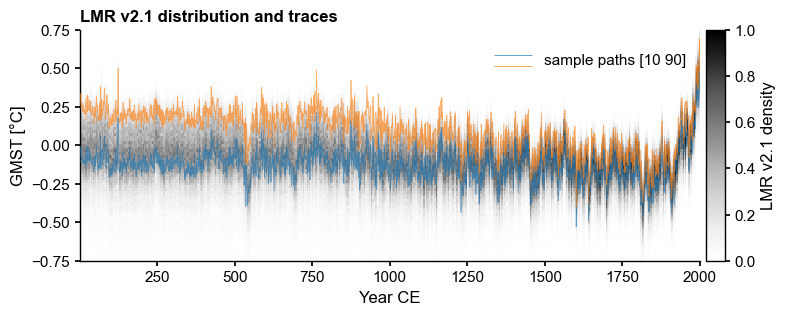

In [12]:
fig_a, ax = plt.subplots(1,1,figsize = (8,3))
LMR.line_density(ax=ax,ylim=[-.75,.75])
LMR.plot_traces(ax=ax, indices = [9,89], alpha=0.65, xlim=[1,2000])
ax.set_title(LMR.label + ' distribution and traces', 
                 fontweight='bold', loc='left')
ax.set_xlabel(xlabel)

In [13]:
fig_a.savefig('../figures/LMRv2.1_HDI&traces.pdf',dpi=200, bbox_inches='tight')

NB: indices are NOT quantiles. This particular example is somewhat of a fluke. 